# *Brazilian E-Commerce Analysis: Customer Behavior, Payments, and Logistics (Olist Dataset)*

# **Project Context & Business Goal**

## Project Context  

The dataset comes from *[Olist Brazilian E-Commerce(Kaggle)](https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce/)*, which contains real order data from an online marketplace.  
It includes customer information, sellers, products, orders, payments, reviews, and logistics.  

Brazil is a large and diverse country with significant regional differences in **population density, logistics infrastructure, and consumer behavior**.  
Understanding these patterns is crucial for **e-commerce companies, logistics providers, and sellers** to optimize their operations.  

Key challenges that make this analysis relevant:  
- **Geographical diversity**: Northern Brazil has long distances, limited infrastructure, and higher delivery delays compared to the South and Southeast.  
- **Customer concentration**: Most customers are located in São Paulo (SP), Rio de Janeiro (RJ), and Minas Gerais (MG), but expansion into less covered states could unlock new opportunities.  
- **Product diversity**: Olist includes multiple product categories (electronics, fashion, furniture, etc.), each with different purchasing and delivery trends.  
- **Payment methods**: Customers use a variety of payment types (credit card, boleto, voucher, debit card), which impacts financial planning and risk.  

---

## Business Goal  

The main business goal of this project is to:  

- **Understand customer distribution and purchasing behavior across Brazil**.  
- **Identify top-selling product categories** and analyze their regional patterns.  
- **Evaluate delivery performance across states**.  
- **Explore payment preferences** to better adapt financial strategies.  
- **Provide actionable insights** that can help:  
  - Sellers optimize product offerings and stock management.  
  - Logistics providers reduce delays and improve customer satisfaction.  
  - The marketplace design better marketing and expansion strategies.  

# **Import Data**

In [247]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [248]:
orders = pd.read_csv('Dataset/olist_orders_dataset.csv')
order_items = pd.read_csv('Dataset/olist_order_items_dataset.csv')
customers = pd.read_csv('Dataset/olist_customers_dataset.csv')
products = pd.read_csv('Dataset/olist_products_dataset.csv')
payments = pd.read_csv('Dataset/olist_order_payments_dataset.csv')
reviews = pd.read_csv('Dataset/olist_order_reviews_dataset.csv')
sellers = pd.read_csv('Dataset/olist_sellers_dataset.csv')
geolocation = pd.read_csv('Dataset/olist_geolocation_dataset.csv')
category_translation = pd.read_csv('Dataset/product_category_name_translation.csv')

# **Data Cleaning and Summary of each CSV file**

## Orders

In [249]:
orders.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
39614,c8a174ccfc523fa565b784ff38e2797d,0e7433ba0aa979efa04779bc77e8bfec,delivered,2017-12-20 19:56:17,2017-12-21 19:50:47,2017-12-22 22:59:05,2017-12-27 15:34:16,2018-01-09 00:00:00
38971,a1b9ef764d1de3a283a1e60320475964,6de7b73a97f0c187c0f163027139388d,delivered,2017-09-28 12:03:33,2017-09-28 12:24:27,2017-09-29 21:04:39,2017-10-16 20:33:48,2017-10-30 00:00:00
73609,b23dc118eeff3026e4439226216f5246,63f302027b9de5de5e4dbd5da3f70f0a,delivered,2017-11-30 17:41:26,2017-11-30 17:58:46,2017-12-01 17:36:39,2017-12-13 22:23:41,2018-01-03 00:00:00
73462,544f1ebc2ee31c6f923a4feba2e0677e,83e4bbdd6e54fe1a68afb9a644667d4a,delivered,2018-04-20 12:34:50,2018-04-24 19:25:22,2018-04-24 20:03:46,2018-04-25 20:48:26,2018-05-08 00:00:00
97279,d38d019bcc105fd93c466326b28488fc,4c6154c1c3cdbc33e61b72ec84a34574,delivered,2017-12-13 21:11:17,2017-12-13 21:29:01,2017-12-21 14:54:49,2017-12-27 23:47:58,2018-01-10 00:00:00


In [250]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [251]:
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['order_approved_at'] = pd.to_datetime(orders['order_approved_at'])
orders['order_delivered_carrier_date'] = pd.to_datetime(orders['order_delivered_carrier_date'])
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])
orders['order_estimated_delivery_date'] = pd.to_datetime(orders['order_estimated_delivery_date'])

In [252]:
orders.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [253]:
orders.duplicated().sum()

0

In [254]:
orders[orders[['order_delivered_carrier_date', 'order_delivered_customer_date']].isnull().any(axis=1)].sample(5)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
47062,f88efafe68a38b479def426923166490,fe6104f311827c6da370d03f8d54df05,shipped,2017-07-03 13:16:21,2017-07-03 13:25:18,2017-07-03 15:09:44,NaT,2017-07-28
35058,cd143ca82dbe97242de86f5cb2c79ff0,5485ef186dddaa07c8a21e02150d4f87,shipped,2018-06-30 18:45:47,2018-07-05 16:05:55,2018-07-06 10:31:00,NaT,2018-07-26
64788,d54f792bf7c14878fc42ba07c5512ead,2592409d9cdb96ddbad1f10c30cd2b9a,invoiced,2018-07-28 14:41:14,2018-07-30 18:31:18,NaT,NaT,2018-08-20
47372,3cd41dc7c9fceb7de4fb0e9983a4b1ed,f8d5adc32955a3f8c92b0343deebad7f,unavailable,2017-10-10 23:49:13,2017-10-11 13:56:22,NaT,NaT,2017-10-23
62219,b44b36e6b69be34f58753d3b56d24001,a6c9cacb399083fbf6497249c9d3a140,canceled,2018-08-08 14:27:00,NaT,NaT,NaT,2018-08-21


In [255]:
orders['order_status'].unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

In [256]:
orders[orders[['order_delivered_carrier_date', 'order_delivered_customer_date']].isnull().any(axis=1)].groupby('order_status', as_index=False).size().sort_values('size')

,order_status,size
0,approved,2
2,created,5
3,delivered,9
5,processing,301
4,invoiced,314
7,unavailable,609
1,canceled,619
6,shipped,1107


### Orders Summary

The `orders` dataset contains 99,441 unique orders with no duplicate rows.

We observed missing values in the columns `order_delivered_carrier_date` and `order_delivered_customer_date`. A closer look shows that these missing values occur mainly in orders with statuses such as `'shipped'` (1,107 cases), `'canceled'` (619), `'unavailable'` (609), `'invoiced'` (314), `'processing'` (301), and to a much lesser extent in `'delivered'` (9).

These missing values are expected — for example:

- `'canceled'` / `'unavailable'` orders are never delivered.
- `'shipped'` orders may not yet have been received by customers.

Therefore, these nulls are not errors, but reflect the natural order lifecycle.  
For analyses focused on delivery performance or customer satisfaction, we will filter for `order_status == 'delivered'`, where timestamps are complete and meaningful.

Overall, the dataset is clean and informative, with well-defined order statuses, making it suitable for future analysis.


## Order_items

In [257]:
order_items.sample(10)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
10944,18ef2a64141eab548a2c46df2545b1ee,1,f8dc3e347e9b954a84d1d5e42b500e4c,4e7c18b98d84e05cbae3ff0ff03846c2,2017-02-12 14:41:53,10.0,17.78
10637,184caad9d2255768d98251b3715e8e8d,1,0c52fe573de020553e4f524ac4267c92,cac63f48c38cd7d002a7e846dcd99a23,2018-05-09 20:52:53,89.9,7.49
61020,8b141e527f5e1f02caf783718ab2af37,1,44053ed0088d0655ed338810cd2d4d51,00ee68308b45bc5e2660cd833c3f81cc,2017-12-27 11:50:44,138.0,9.78
19921,2db65679ff1d05444ec29ab329f8ae82,1,41c24b8ce92d1a2cac62db5edfd088b2,4869f7a5dfa277a7dca6462dcf3b52b2,2018-04-26 16:31:50,102.9,13.16
9775,1662d64304e6e02a627e29b14898060c,1,86133a2151bd98a3ed2ad758709e6d1b,f27e33c6d29b5138fa9967bcd445b6d5,2017-11-01 02:56:31,59.9,11.73
48483,6e35ff13275ac852d4ba9a446ae8cf1b,1,736f1b87428f9cfe5f5184c4ac0fbe05,1dc2de47ee26a0a5b12dc14fd6dc0dea,2018-02-08 15:30:19,55.9,20.88
49347,701a22b8c16c09a0c9514c41dfbf28de,1,a39dac35775c3a863b0b7b6d72e839ca,7ecef8194babfec876ca720714327841,2018-07-22 21:02:32,66.0,19.65
58897,862367d9dd9e80263c5b728d8c81b2a6,4,53759a2ecddad2bb87a079a1f1519f73,1f50f920176fa81dab994f9023523100,2018-02-15 12:28:08,49.9,13.37
82886,bc3b41b122d09bb7f293e287bb496235,1,149e60a7a51b85a834c055f8025ae3e5,95e03ca3d4146e4011985981aeb959b9,2017-08-30 00:50:25,25.0,7.94
107258,f3c0148d00a2ed7692358f4d849c7e46,1,490b7f74cbef35be4b6b69bb5f177386,9b00ed88b7fdb95d6ff76e27c1b52d16,2017-12-01 13:51:51,12.5,15.10


In [258]:
order_items.shape

(112650, 7)

In [259]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [260]:
order_items.describe()[['price', 'freight_value']]

,price,freight_value
count,112650.000000,112650.000000
mean,120.653739,19.990320
std,183.633928,15.806405
min,0.850000,0.000000
25%,39.900000,13.080000
50%,74.990000,16.260000
75%,134.900000,21.150000
max,6735.000000,409.680000


In [261]:
order_items.duplicated().sum()

0

### Order Value Breakdown (Product + Freight)

Let's take a closer look at a single order (`order_id = '00143d0f86d6fbd9f9b38ab440ac16f5'`), which contains 3 units of the same product.

Each item has:
- Product price: `21.33`
- Freight cost: `15.10`

Therefore:
- Total product value = `21.33 * 3 = 63.99`
- Total freight value = `15.10 * 3 = 45.30`
- Total order value = `63.99 + 45.30 = 109.29`

We confirmed this by aggregating `price` and `freight_value` per order and summing them into `total_order_value`.


In [262]:
order_items[order_items['order_id'] == '00143d0f86d6fbd9f9b38ab440ac16f5']

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
32,00143d0f86d6fbd9f9b38ab440ac16f5,1,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.1
33,00143d0f86d6fbd9f9b38ab440ac16f5,2,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.1
34,00143d0f86d6fbd9f9b38ab440ac16f5,3,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.1


In [263]:
order_costs = order_items.groupby('order_id', as_index=False)[['price', 'freight_value']].sum()

In [264]:
order_costs['total_order_value'] = order_costs['price'] + order_costs['freight_value']

In [265]:
order_costs[order_costs['order_id'] == '00143d0f86d6fbd9f9b38ab440ac16f5']

,order_id,price,freight_value,total_order_value
31,00143d0f86d6fbd9f9b38ab440ac16f5,63.99,45.3,109.29


In [266]:
order_items = order_items.merge(order_costs[['order_id', 'total_order_value']], on = 'order_id', how = 'left')

In [267]:
order_items.sample(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,total_order_value
60698,8a56e815ea075300734800bf2c0b52cb,2,8dc068efed6312b226cb8f74127314c9,6edacfd9f9074789dad6d62ba7950b9c,2017-04-12 14:05:15,60.9,20.48,137.58
79717,b551afd1cbe632e6dd51f14132235d27,1,1c55a8be0613dd888ed9c039cea3d660,870d0118f7a9d85960f29ad89d5d989a,2017-07-20 20:15:10,62.9,25.28,176.36
52710,77f120015ca363b1f0bd4c879f902eab,1,e87b2200e1df21f624eea3e9bd087dc0,0432ead42b6c8a0bdf68154add917fdf,2017-04-06 16:42:26,89.9,19.78,219.47
8680,13d1f1aae5f022a221984b4b9802a73d,1,a266930db2217c102cb34cb715b5d479,3c7c4a49ec3c6550809089c6a2ca9370,2018-02-21 15:06:35,98.9,7.95,106.85
14428,20db59f6705840a0ce5c76b77487ad03,2,9799f204443f39b914cb108eb13ef6e2,55dedd83e501d8248880557d9073cbfd,2018-08-30 19:43:55,84.9,8.01,185.82


### Order_items Summary 

The `order_items` dataset contains 112,650 records with no missing values or duplicate rows.

- The average product price (`price`) is approximately 120.65 BRL, with a standard deviation of 183.63, indicating a wide range of product costs.
- Prices range from as low as 0.85 BRL to a maximum of 6,735 BRL, with the median price at 74.99 BRL.
- The average freight cost (`freight_value`) per item is about 19.99 BRL, with a standard deviation of 15.81.
- Freight costs vary from 0 BRL up to 409.68 BRL, with a median of 16.26 BRL.

Overall, the dataset provides a comprehensive view of product pricing and shipping costs.


## Customers

In [268]:
customers.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
36500,807ab8a87b6d20224250b92f71a09f77,02e8d64ed3a2d66ec146674efbfe3dd3,23050,rio de janeiro,RJ
51347,7332ab77b4f9e949485c129a42149b9e,e32108437b7ddcd30eeeb14110680a8b,5332,sao paulo,SP
71385,8ed1eac4a6e3270d12bc685cd1c5267b,42dd498d625fc72826dbf3463fea4d93,13572,sao carlos,SP
72616,dc0fe965592b8547fc22ddf2a96dceb7,5fd1897927609de45b0f55739501d495,19360,santo anastacio,SP
83230,a17dd8395f84735ded00a43107b1b58d,55be166edf74ab9e31cac5405121ca37,12242,sao jose dos campos,SP


In [269]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [270]:
customers.duplicated().sum()

0

In [271]:
customers['customer_id'].nunique()

99441

In [272]:
customers['customer_unique_id'].nunique()

96096

### Customers Summary 

The customers dataset contains information about individual buyers who placed orders on the Olist platform.

- **No duplicate rows** were found in the dataset (`customers.duplicated().sum() == 0`).
- There are **99,441 total customer entries** (`customer_id`), each corresponding to a unique order.
- These entries represent **96,096 unique customers** (`customer_unique_id`), which indicates that some customers placed **multiple orders** over time.

This distinction between `customer_id` and `customer_unique_id` is important, as it highlights recurring customer behavior and allows for deeper customer lifecycle analysis.


## Products

In [273]:
products.sample(5)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
23091,1d0b9497ac4f258fbd822c52ff61b5f4,cama_mesa_banho,56.0,510.0,1.0,400.0,16.0,10.0,16.0
5987,d86a0708a75b7ba0080d94dc632fbc23,beleza_saude,37.0,634.0,2.0,200.0,16.0,10.0,16.0
21553,cdd37c09b1f47401bdce0f38d3a7f485,cama_mesa_banho,58.0,636.0,1.0,1000.0,20.0,16.0,20.0
3951,488edbf15626ebb4b69d6c4600602ba3,alimentos_bebidas,40.0,907.0,1.0,472.0,19.0,16.0,16.0
30298,39b412b5207741a171a17c32e630fe70,ferramentas_jardim,42.0,300.0,1.0,400.0,23.0,3.0,12.0


In [274]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [275]:
products.isnull().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [276]:
products.duplicated().sum()

0

In [277]:
products[products['product_weight_g'].isnull()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
8578,09ff539a621711667c43eba6a3bd8466,bebes,60.0,865.0,3.0,NaN,NaN,NaN,NaN
18851,5eb564652db742ff8f28759cd8d2652a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [278]:
product_id_check = products.merge(order_items, on='product_id', how = 'right')
product_id_check[product_id_check['product_id'] == '5eb564652db742ff8f28759cd8d2652a'].head(5)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,total_order_value
7098,5eb564652db742ff8f28759cd8d2652a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,101157d4fae1c9fb74a00a5dee265c25,1,4e922959ae960d389249c378d1c939f5,2017-04-11 08:02:26,29.0,14.52,43.52
9233,5eb564652db742ff8f28759cd8d2652a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1521c6bb7b1028154c8c67cf80fa809f,1,4e922959ae960d389249c378d1c939f5,2017-04-07 10:10:16,29.0,16.05,45.05
28715,5eb564652db742ff8f28759cd8d2652a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,415cfaaaa8cea49f934470548797fed1,1,4e922959ae960d389249c378d1c939f5,2017-04-07 10:35:19,29.0,14.52,87.04
28716,5eb564652db742ff8f28759cd8d2652a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,415cfaaaa8cea49f934470548797fed1,2,4e922959ae960d389249c378d1c939f5,2017-04-07 10:35:19,29.0,14.52,87.04
39299,5eb564652db742ff8f28759cd8d2652a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,595316a07cd3dea9db7adfcc7e247ae7,1,4e922959ae960d389249c378d1c939f5,2017-08-18 04:26:04,39.0,9.27,48.27


In [279]:
product_id_check[product_id_check['product_id'] == '5eb564652db742ff8f28759cd8d2652a'].shape

(17, 16)

### Products Summary

- The dataset has no duplicates, but contains several missing values across different columns:
  - `product_category_name`, `product_name_lenght`, `product_description_lenght`, `product_photos_qty`
  - Physical dimensions: `product_weight_g`, `product_length_cm`, `product_height_cm`, `product_width_cm`
- There are **2 products** with missing values in all physical dimension columns, including weight.
- One of these products (`product_id: 5eb564652db742ff8f28759cd8d2652a`) appears in the `order_items` dataset **17 times**, although it has no metadata or physical details (`NaN` in all relevant columns).


## Payments

In [280]:
payments.sample(5)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
32574,0aa240e0cbbe794b5470e659a22b614b,1,boleto,1,82.88
97431,364f451ee38a4268d7c15d317021eb35,7,voucher,1,14.30
1667,55c2859a526d3cbf1df65ee601139c3a,1,boleto,1,35.84
11497,7cbf82e1c7dc73fa8949aefcdf3cfdc9,1,boleto,1,554.40
70028,c38c0f119b3e3e8985c68a0204872116,1,credit_card,4,46.48


In [281]:
payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [282]:
payments.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [283]:
payments.duplicated().sum()

0

In [284]:
payments[(payments['payment_installments'] == 0)]

,order_id,payment_sequential,payment_type,payment_installments,payment_value
46982,744bade1fcf9ff3f31d860ace076d422,2,credit_card,0,58.69
79014,1a57108394169c0b47d8f876acc9ba2d,2,credit_card,0,129.94


In [285]:
payments[(payments['payment_value'] == 0)]

,order_id,payment_sequential,payment_type,payment_installments,payment_value
19922,8bcbe01d44d147f901cd3192671144db,4,voucher,1,0.0
36822,fa65dad1b0e818e3ccc5cb0e39231352,14,voucher,1,0.0
43744,6ccb433e00daae1283ccc956189c82ae,4,voucher,1,0.0
51280,4637ca194b6387e2d538dc89b124b0ee,1,not_defined,1,0.0
57411,00b1cb0320190ca0daa2c88b35206009,1,not_defined,1,0.0
62674,45ed6e85398a87c253db47c2d9f48216,3,voucher,1,0.0
77885,fa65dad1b0e818e3ccc5cb0e39231352,13,voucher,1,0.0
94427,c8c528189310eaa44a745b8d9d26908b,1,not_defined,1,0.0
100766,b23878b3e8eb4d25a158f57d96331b18,4,voucher,1,0.0


In [286]:
valid_payments = payments[payments['payment_value'] > 0]

In [287]:
valid_payments.sample(5)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
1507,106035bdd659c0a04d902135f4559663,1,credit_card,1,123.52
75408,9126e0aefae0b65e52c837440e8010a5,1,credit_card,1,63.10
93939,2143f0dfdbb1c47ab7c75c9c097e0173,1,credit_card,8,329.97
49787,97b6ab675f38dce08fc58f7e5ddfa1a7,1,credit_card,10,275.48
66534,983878e0dee08c5570f8ec3162ac5927,1,debit_card,1,909.31


In [288]:
valid_payments.describe()

,payment_sequential,payment_installments,payment_value
count,103877.000000,103877.000000,103877.000000
mean,1.092340,2.853509,154.113732
std,0.704312,2.687112,217.498755
min,1.000000,0.000000,0.010000
25%,1.000000,1.000000,56.820000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.840000
max,29.000000,24.000000,13664.080000


## Payments Summary

### General Overview

- The dataset contains **no duplicate rows** — each row represents an individual payment transaction.
- There are **no missing (`NaN`) values** in the dataset.
- However, we observed some **rows with zero values**:
  - `payment_value == 0` — indicates that no payment was made or there may be a data entry issue.
  - `payment_installments == 0` — number of installments is zero, which is unusual for a valid payment.

### What do zero values potentially mean?

| Column                     | Possible reasons for `0` values                                               |
|----------------------------|--------------------------------------------------------------------------------|
| `payment_value == 0`       | - Cancelled order<br>- Free transaction<br>- Data entry error                |
| `payment_installments == 0`| - Incorrect value<br>- System issue<br>- Test data or invalid entry          |

### Decision

- For calculating **total revenue**, **average order value**, and **customer behavior**, we include **only rows where `payment_value > 0`**.

#### Summary statistics (based on `describe()`):

| Feature                | Description                                                                 |
|------------------------|-----------------------------------------------------------------------------|
| `payment_sequential`   | The sequence number of the payment within an order (mostly 1, but up to 29)  |
| `payment_installments` | Number of installments used to pay for the order (average ~2.85, max 24)    |
| `payment_value`        | Payment amount in local currency (mean ≈ 154.11, max 13,664.08)              |

- The average number of installments per order is approximately 2.85, with most orders paid in 1 to 4 installments.
- Payment values vary widely, with a median around 100 and some high-value payments exceeding 13,000.


## Reviews

In [289]:
reviews.sample(5)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
21522,e7461b9337218d66df478e9305bee616,8138944aa954bbc7c286a30839130583,1,NaN,Não gostei desta compra pois a entrega atrasou...,2018-03-31 00:00:00,2018-04-01 01:13:19
78266,5a8330b561333cd65d661abe24d012d2,8732033fb707f8ee6155112c39a727b4,5,NaN,NaN,2018-05-12 00:00:00,2018-05-14 14:53:41
2334,55aae9e20c0dcc0c88b4d6a117c07596,469281a9ac9b1cb74fedc17445f70fb1,5,NaN,NaN,2017-12-17 00:00:00,2017-12-19 18:11:27
68312,3700f8d8618f19efc7f9443bd41cc551,0fe8b4edfb85dd0eb662345e71b30378,5,NaN,NaN,2018-01-11 00:00:00,2018-01-15 00:06:38
29978,4d39ae35238e4af367c65ad241592c02,30dfd9f2d61a37d83d75eaba39d110f6,5,NaN,NaN,2017-06-28 00:00:00,2017-06-29 00:42:28


In [290]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [291]:
reviews.isnull().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [292]:
reviews.duplicated().sum()

0

In [293]:
reviews['review_answer_timestamp'] = pd.to_datetime(reviews['review_answer_timestamp'])
reviews['review_creation_date'] = pd.to_datetime(reviews['review_creation_date'])
reviews['review_hours'] = ((reviews['review_answer_timestamp'] - reviews['review_creation_date'])/ pd.Timedelta(hours=1)).round(0)
reviews['review_days'] = ((reviews['review_answer_timestamp'] - reviews['review_creation_date'])/ pd.Timedelta(days=1)).round(0)
reviews['review_score'] = reviews['review_score'].astype(int)

In [294]:
reviews.sample(5)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,review_hours,review_days
76677,6c31272406862179799102165df70162,f7bb6bf5a28b347af13018a4b21ced6d,4,NaN,NaN,2017-07-25,2017-07-25 20:16:39,20.0,1.0
72367,03a73c6220f52447c4c41ac635b97b69,1361dafbb17a41b4073880b5f839962b,1,NaN,NaN,2018-04-07,2018-04-07 13:12:59,13.0,1.0
26845,466078d6c23c3fa723ee52f1c3028b54,bb2333fb2f478ee47fffef086d24da16,5,NaN,NaN,2017-09-26,2017-09-28 01:00:26,49.0,2.0
22418,797ebf89220cf5cae7e5f52d38ec0a94,baed25a07d23ba7d05770c3f8562ecba,5,NaN,NaN,2018-08-30,2018-08-31 15:19:42,39.0,2.0
55444,2d54a0b8a88516735d2c07d8004f76ce,1d5912d4e665fb2a085a50fc13007c02,5,NaN,NaN,2018-05-20,2018-05-28 02:48:59,195.0,8.0


In [295]:
reviews.describe()[['review_score', 'review_hours', 'review_days']]

,review_score,review_hours,review_days
count,99224.000000,99224.000000,99224.000000
mean,4.086421,75.574609,3.213658
min,1.000000,2.000000,0.000000
25%,4.000000,24.000000,1.000000
50%,5.000000,40.000000,2.000000
75%,5.000000,74.000000,3.000000
max,5.000000,12449.000000,519.000000
std,1.347579,237.360642,9.904641


In [296]:
reviews.dtypes

review_id                          object
order_id                           object
review_score                        int32
review_comment_title               object
review_comment_message             object
review_creation_date       datetime64[ns]
review_answer_timestamp    datetime64[ns]
review_hours                      float64
review_days                       float64
dtype: object

## Reviews Summary

### General Overview

- The dataset contains **99,224 customer reviews**.
- There are **no duplicate rows**.
- There are **no missing values** in the key columns:
  - `review_id`, `order_id`, `review_score`, `review_creation_date`, `review_answer_timestamp` are **fully populated**.
- However, a **large portion of reviews are missing written comments**:
  - `review_comment_title`: missing in **87,656** entries (~88%).
  - `review_comment_message`: missing in **58,247** entries (~59%).
  - Many users provided only a numeric score without textual feedback.

### Time-Based Features

To analyze review response time, two new columns were created:

- `review_hours`: the number of hours between review creation and response.
- `review_days`: the same delay expressed in days.
- **Average review time is 76 hours.**

## Sellers

In [297]:
sellers.sample(5)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
1711,f7c31656c19db6275a8acadca289f426,14940,ibitinga,SP
2946,06579cb253ecd5a3a12a9e6eb6bf8f47,4007,sao paulo - sp,SP
949,5b664594895aefb418afaee6d40a9a23,25750,petropolis,RJ
2509,29e6e05b65f93bc224c644319dc52ecf,36010,juiz de fora,MG
921,ace601496e211a664100321f038f50af,2372,sao paulo,SP


In [298]:
sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [299]:
sellers.nunique()

seller_id                 3095
seller_zip_code_prefix    2246
seller_city                611
seller_state                23
dtype: int64

In [300]:
sellers.duplicated().sum()

0

In [301]:
sellers['seller_state'].value_counts()

seller_state
SP    1849
PR     349
MG     244
SC     190
RJ     171
RS     129
GO      40
DF      30
ES      23
BA      19
CE      13
PE       9
PB       6
RN       5
MS       5
MT       4
RO       2
SE       2
PI       1
AC       1
MA       1
AM       1
PA       1
Name: count, dtype: int64

## Sellers Summary

The sellers dataset contains information about unique sellers in the marketplace, including their ID, city, state, and zip code prefix. There are no missing values or duplicate rows, and all `seller_id` entries are unique.

A total of **3095** unique sellers are recorded, across **23** states in Brazil. 



## Geolocation

In [302]:
geolocation.sample(5)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
72750,4042,-23.602764,-46.643273,sao paulo,SP
765406,66020,-1.459700,-48.502943,belém,PA
889721,86701,-23.408633,-51.435711,arapongas,PR
556837,30720,-19.916300,-43.968177,belo horizonte,MG
171761,6730,-23.612021,-47.019901,vargem grande paulista,SP


In [303]:
geolocation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [304]:
geolocation.duplicated().sum()

261831

In [305]:
geolocation = geolocation.drop_duplicates()

In [306]:
geolocation.shape

(738332, 5)

### Geolocation Summary

- The `geolocation` dataset initially contained **261,831 fully duplicated rows**, which means these rows were completely identical across all columns.
- For data cleaning purposes, all fully duplicated rows were removed using `.drop_duplicates()`.
- The cleaned dataset now contains only **unique geolocation entries**.


## Category_translation

In [307]:
category_translation.head(5)

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


## Category Translation Summary

The dataset provides translations of product category names from Portuguese to English.


# **EDA & Visualisation**

## Orders & Purchase Behavior

What is the distribution of order statuses?

In [308]:
order_statuses = orders.groupby('order_status', as_index = False).size().sort_values('size', ascending=False)

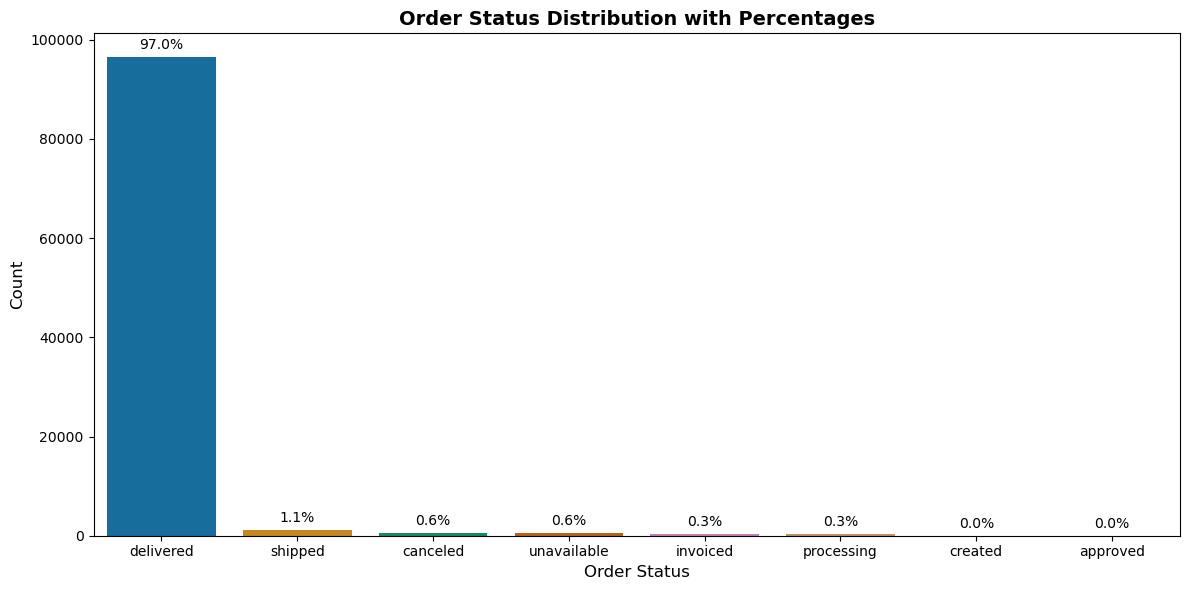

In [309]:
total = order_statuses['size'].sum()

plt.figure(figsize=(12, 6))
ax = sns.barplot(order_statuses, 
                 x='order_status', 
                 y='size', 
                 palette='colorblind', 
                 hue='order_status')

for p in ax.patches:
    height = p.get_height()
    percentage = f'{100 * height / total:.1f}%'
    ax.text(p.get_x() + p.get_width() / 2, height + total * 0.01, percentage,
            ha='center', va='bottom', fontsize=10)

plt.ylabel('Count', fontsize=12)
plt.xlabel('Order Status', fontsize=12)
plt.title('Order Status Distribution with Percentages', fontsize=14, weight='bold')
plt.tight_layout()


How has the number of purchases evolved over time?

In [310]:
orders['Month_Year_purchase'] = orders['order_purchase_timestamp'].dt.to_period('M').astype(str)
orders.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,Month_Year_purchase
16836,d7bfe7ef14d1debee523b680ae421489,4e5aecb5ec6b900f8de063308bbc55cb,delivered,2018-05-01 22:43:44,2018-05-01 23:12:20,2018-05-03 16:10:00,2018-05-15 20:49:11,2018-05-28,2018-05
51177,6a13786d6992a094c95cc09bcd4527fc,17347cd672444b9489c0798ca77ff3f7,delivered,2018-03-23 12:43:39,2018-03-24 12:35:35,2018-03-26 18:19:02,2018-04-04 18:16:32,2018-04-05,2018-03
3412,d1f60863289ae7cd6e47fd70eae9bec4,175231d5968a57218468d2517a6a4621,delivered,2017-08-15 15:23:30,2017-08-15 16:24:37,2017-08-18 10:07:55,2017-08-24 21:40:06,2017-09-19,2017-08
25995,0fd20e900b40f5cb8e6fd31df27aabbd,ac3fbcb5772c50de636f614e8c6459a6,delivered,2017-04-07 07:26:40,2017-04-08 14:35:19,2017-04-25 11:46:34,2017-05-12 16:13:11,2017-05-11,2017-04
72425,5364d08bc3ef658354a3d13d17051f49,5ac92711268d4e0ec3a63f3dc96e6670,delivered,2018-01-26 18:44:07,2018-01-26 18:52:05,2018-01-30 18:18:43,2018-02-07 20:42:35,2018-02-21,2018-01


In [311]:
month_year_purchases = orders.groupby('Month_Year_purchase', as_index=False).size().sort_values('Month_Year_purchase')
month_year_purchases.head(5)

,Month_Year_purchase,size
0,2016-09,4
1,2016-10,324
2,2016-12,1
3,2017-01,800
4,2017-02,1780


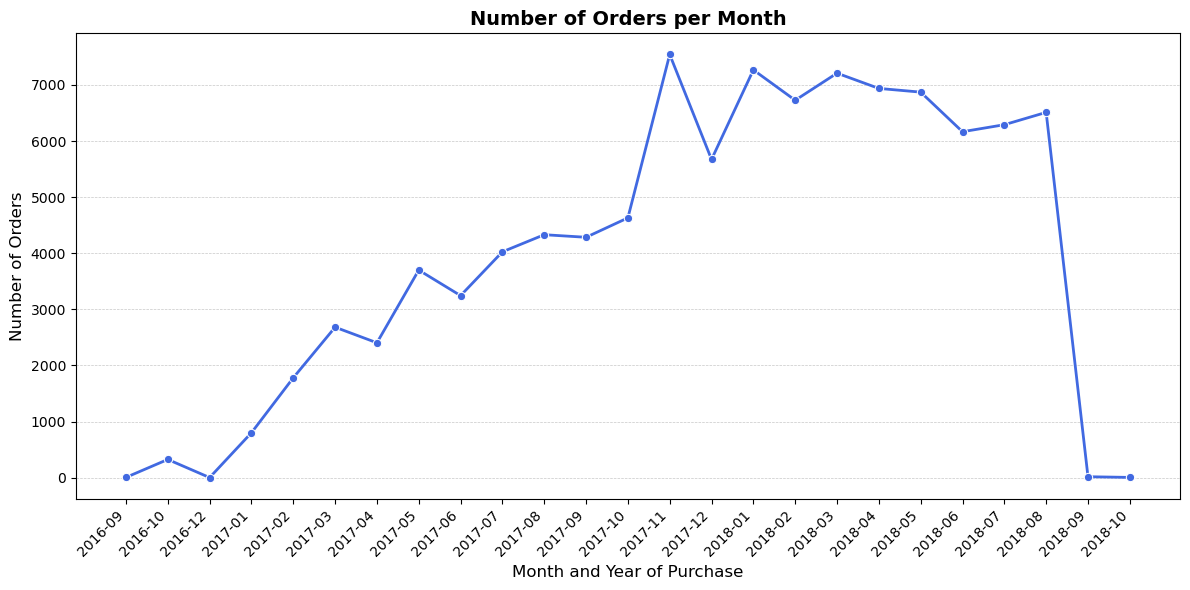

In [312]:
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=month_year_purchases,
    x='Month_Year_purchase',
    y='size',
    marker='o',
    linewidth=2,
    color='royalblue'
)

plt.xlabel('Month and Year of Purchase', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.title('Number of Orders per Month', fontsize=14, weight='bold')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.grid(True, which='major', axis='y', linestyle='--', linewidth=0.5, alpha=0.7)


What are the peak months for customer purchases?

In [313]:
month_year_purchases.sort_values('size', ascending=False).head(5)

,Month_Year_purchase,size
13,2017-11,7544
15,2018-01,7269
17,2018-03,7211
18,2018-04,6939
19,2018-05,6873


On what day of week brazilians customers tend to do online purchasing?

In [314]:
orders['day_of_purchase'] = orders['order_purchase_timestamp'].dt.day_name()

In [315]:
purchases_days = orders.groupby('day_of_purchase', as_index=False).size()

ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
purchases_days['day_of_purchase'] = pd.Categorical(
    purchases_days['day_of_purchase'],
    categories=ordered_days,
    ordered=True
)

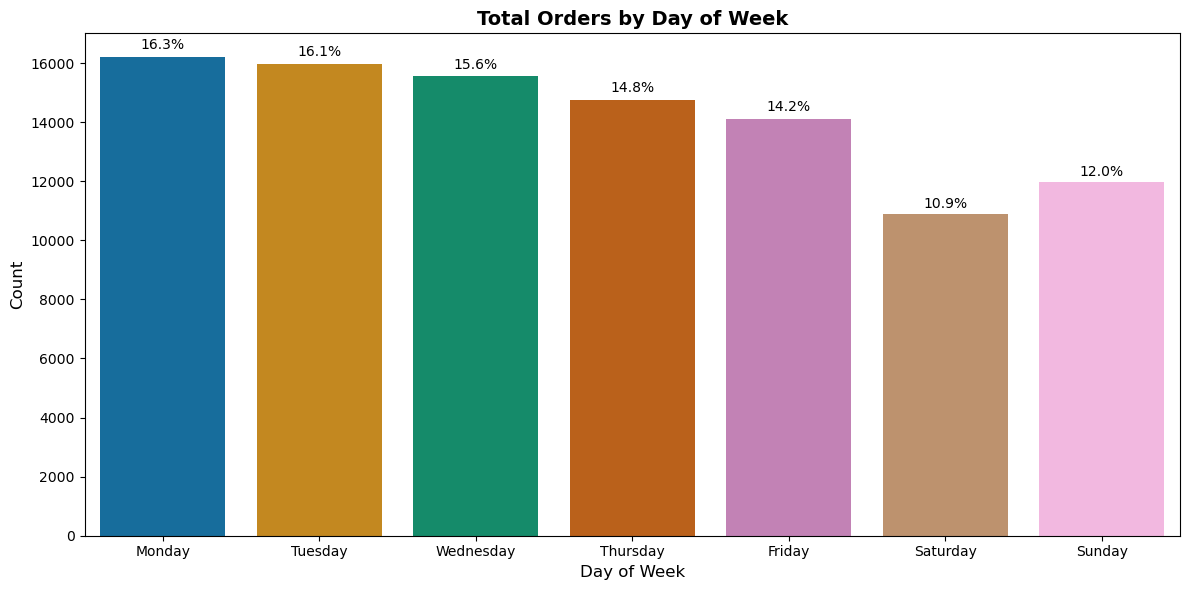

In [316]:
total = purchases_days['size'].sum()

plt.figure(figsize=(12,6))
ax = sns.barplot(purchases_days, 
                 x='day_of_purchase', 
                 y='size', 
                 palette='colorblind', 
                 hue='day_of_purchase')

for p in ax.patches:
    height = p.get_height()
    percentage = f'{100 * height / total:.1f}%'
    ax.text(p.get_x() + p.get_width() / 2, height + height * 0.01, percentage,
        ha='center', va='bottom', fontsize=10)

plt.ylabel('Count', fontsize=12)
plt.xlabel('Day of Week', fontsize=12)
plt.title('Total Orders by Day of Week', fontsize=14, weight='bold')
plt.tight_layout()

### **Key Insights in Orders & Purchase Behavior**

Based on the charts above, we can conclude the following:

- The majority of orders were successfully delivered. Only about 3% of all orders fall under other statuses.
- E-commerce in Brazil shows a clear upward trend over time.
- There is some seasonality, with noticeable peaks in certain months. However, the overall trend indicates that Brazilian customers are increasingly inclined to shop online.
- Mondays are the most popular day for online purchases in Brazil.
- **Note:** There is a noticeable drop in orders between August and September 2018, which may be due to noise or inconsistencies in the data.


## Products & Sales

Which product categories are the most popular(by number of items ordered)?

In [317]:
product_orders = order_items.merge(products, on='product_id', how='left')

In [318]:
product_orders.sample(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,total_order_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
77294,aff4313b33f91694afcfa2064fd20878,1,e869d449cc32881790ef9af9b4c670f8,17a053fcb14bd219540cbde0df490be0,2018-01-10 10:39:23,399.90,35.05,434.95,moveis_escritorio,50.0,2220.0,1.0,15700.0,58.0,28.0,58.0
36357,526e5c7b86409498289e780020805f70,1,08a7edee09bde7cfc9504bc369e64cb1,a416b6a846a11724393025641d4edd5e,2017-12-05 02:20:25,230.98,12.82,243.80,beleza_saude,52.0,637.0,1.0,917.0,28.0,16.0,20.0
66845,98c9976c0165c833a2233f98969d1b36,1,839321c2db7b3b3eaff4944c3b052ecd,d25aa0aaacb370e912f8cf6efeba38b3,2018-04-23 09:35:16,113.89,23.38,137.27,utilidades_domesticas,37.0,570.0,1.0,1291.0,23.0,23.0,20.0
13918,1fab4ac9d85079b3da72a11475ae1685,1,7a10781637204d8d10485c71a6108a2e,4869f7a5dfa277a7dca6462dcf3b52b2,2017-09-07 22:31:41,229.90,13.11,243.01,relogios_presentes,42.0,236.0,1.0,342.0,18.0,13.0,15.0
36979,53fbedbd16ccffa3a54c400edbb3fecb,1,4bb4fb9c85785b75ab4f6559900c7ca1,ef506c96320abeedfb894c34db06f478,2017-03-15 22:01:34,37.99,14.11,52.10,telefonia,49.0,394.0,2.0,150.0,19.0,4.0,20.0


In [319]:
PT_top_categories = product_orders.groupby('product_category_name', as_index=False).size().sort_values('size', ascending=False)

In [320]:
top_categories = PT_top_categories.merge(category_translation, on='product_category_name', how='left')

In [321]:
top_categories

,product_category_name,size,product_category_name_english
0,cama_mesa_banho,11115,bed_bath_table
1,beleza_saude,9670,health_beauty
2,esporte_lazer,8641,sports_leisure
3,moveis_decoracao,8334,furniture_decor
4,informatica_acessorios,7827,computers_accessories
...,...,...,...
68,cds_dvds_musicais,14,cds_dvds_musicals
69,la_cuisine,14,la_cuisine
70,pc_gamer,9,NaN
71,fashion_roupa_infanto_juvenil,8,fashion_childrens_clothes


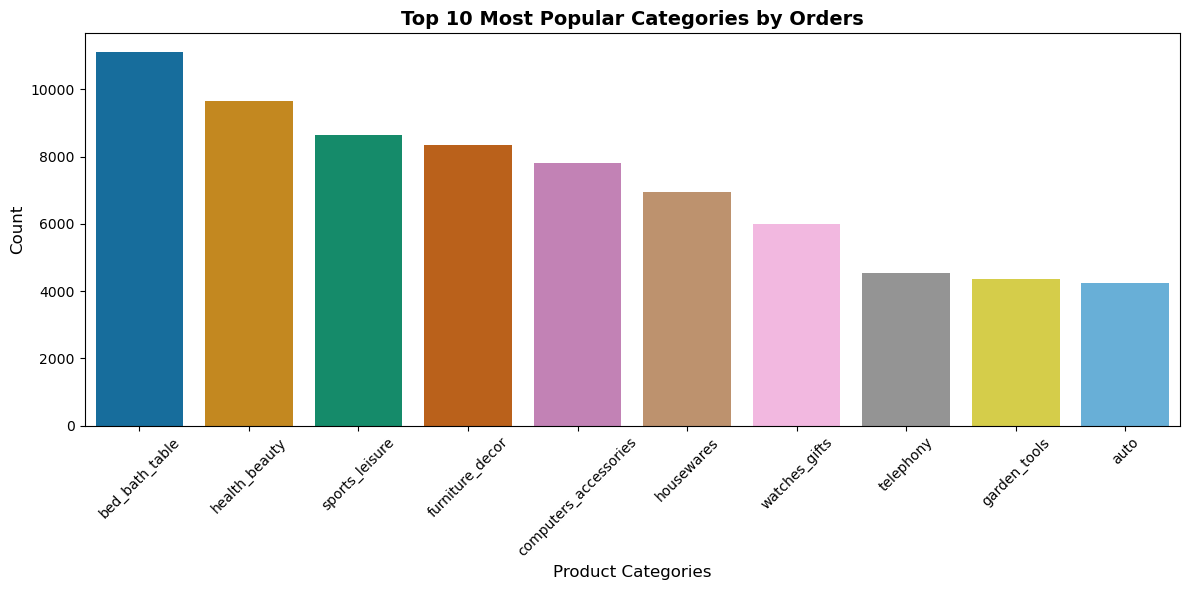

In [322]:
plt.figure(figsize=(12, 6))
sns.barplot(top_categories.head(10),
            x = 'product_category_name_english',
            y = 'size',
            hue = 'product_category_name_english',
            palette='colorblind')

plt.xticks(rotation = 45)
plt.title('Top 10 Most Popular Categories by Orders', fontsize = 14, weight = 'bold')
plt.xlabel('Product Categories', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.tight_layout()

Which product categories generate the highest total revenue?

In [323]:
PT_top_categories_revenue = product_orders.groupby('product_category_name', as_index=False).sum()[['product_category_name', 'total_order_value']].sort_values('total_order_value', ascending=False)

In [324]:
top_categories_revenue = PT_top_categories_revenue.merge(category_translation, on='product_category_name', how='left').rename(columns={'total_order_value':'total_revenue'})

In [325]:
top_categories_revenue

,product_category_name,total_revenue,product_category_name_english
0,cama_mesa_banho,1711541.72,bed_bath_table
1,beleza_saude,1657769.17,health_beauty
2,informatica_acessorios,1585208.17,computers_accessories
3,moveis_decoracao,1429656.03,furniture_decor
4,relogios_presentes,1428999.10,watches_gifts
...,...,...,...
68,pc_gamer,2174.43,NaN
69,casa_conforto_2,1710.54,home_comfort_2
70,cds_dvds_musicais,1199.43,cds_dvds_musicals
71,fashion_roupa_infanto_juvenil,785.67,fashion_childrens_clothes


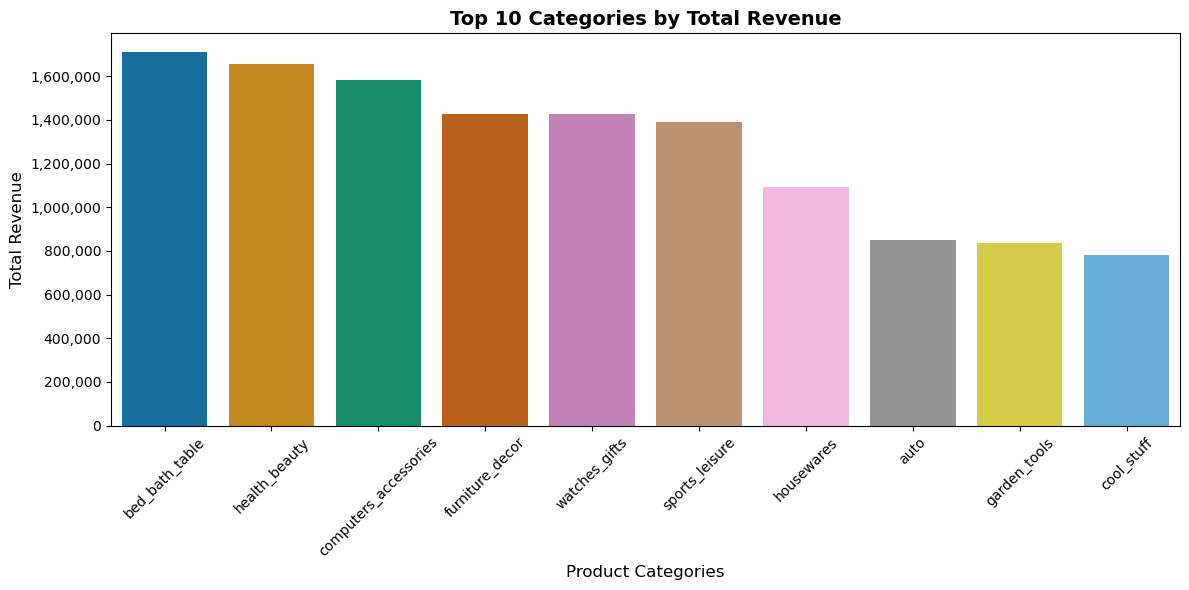

In [326]:
from matplotlib.ticker import FuncFormatter

plt.figure(figsize=(12, 6))

sns.barplot(
    data=top_categories_revenue.head(10),
    x='product_category_name_english',
    y='total_revenue',
    palette='colorblind',
    hue = 'product_category_name_english'
)

# Format y-axis to show comma separators (e.g., 1,000,000 instead of 1e6)
formatter = FuncFormatter(lambda x, _: f'{int(x):,}')
plt.gca().yaxis.set_major_formatter(formatter)

plt.xticks(rotation=45)
plt.title('Top 10 Categories by Total Revenue', fontsize=14, weight='bold')
plt.xlabel('Product Categories', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.tight_layout()

What is the average order value per product category?

In [327]:
product_orders.dtypes

order_id                       object
order_item_id                   int64
product_id                     object
seller_id                      object
shipping_limit_date            object
price                         float64
freight_value                 float64
total_order_value             float64
product_category_name          object
product_name_lenght           float64
product_description_lenght    float64
product_photos_qty            float64
product_weight_g              float64
product_length_cm             float64
product_height_cm             float64
product_width_cm              float64
dtype: object

In [328]:
PT_avg_price_per_category = product_orders.groupby('product_category_name', as_index=False).mean(numeric_only=True)[['product_category_name', 'total_order_value']].sort_values('total_order_value', ascending=False)

In [329]:
avg_price_per_category = PT_avg_price_per_category.merge(category_translation, on='product_category_name', how='left').rename(columns={'total_order_value':'average_order_value'})

In [330]:
avg_price_per_category

,product_category_name,average_order_value,product_category_name_english
0,pcs,1374.983202,computers
1,telefonia_fixa,784.103068,fixed_telephony
2,portateis_casa_forno_e_cafe,673.769342,small_appliances_home_oven_and_coffee
3,agro_industria_e_comercio,560.025708,agro_industry_and_commerce
4,eletrodomesticos_2,523.375882,home_appliances_2
...,...,...,...
68,livros_tecnicos,93.307828,books_technical
69,alimentos,91.002490,food
70,cds_dvds_musicais,85.673571,cds_dvds_musicals
71,flores,67.061818,flowers


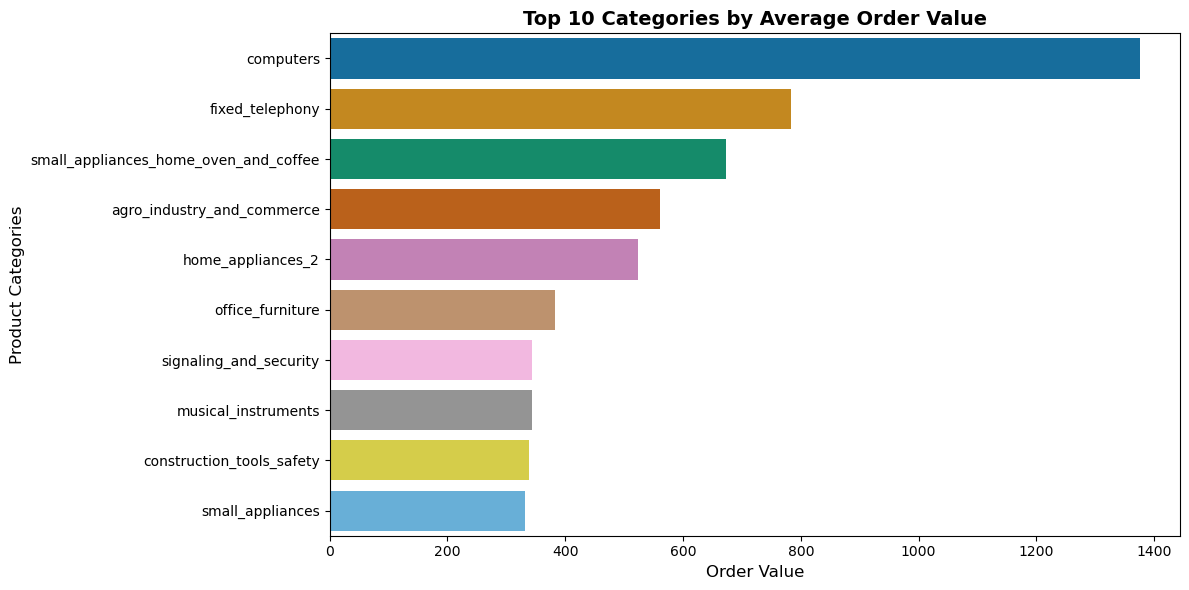

In [331]:
plt.figure(figsize=(12, 6))

sns.barplot(
    data=avg_price_per_category.head(10),
    y='product_category_name_english',
    x='average_order_value',
    palette='colorblind',
    hue = 'product_category_name_english'
)
 
plt.title('Top 10 Categories by Average Order Value', fontsize=14, weight='bold')
plt.ylabel('Product Categories', fontsize=12)
plt.xlabel('Order Value', fontsize=12)
plt.tight_layout()

In [332]:
avg_price_per_category[(avg_price_per_category['product_category_name_english']=='bed_bath_table') | (avg_price_per_category['product_category_name_english']=='health_beauty')]

,product_category_name,average_order_value,product_category_name_english
34,beleza_saude,171.434247,health_beauty
42,cama_mesa_banho,153.984860,bed_bath_table


In [333]:
top_categories[top_categories['product_category_name_english']=='computers']

,product_category_name,size,product_category_name_english
45,pcs,203,computers


### **Key Insights in Products & Sales**

Based on the charts above, we can draw the following conclusions:

- The most frequently ordered product categories are `bed_bath_table`, `health_beauty`, `sports_leisure`.
- In terms of total revenue, `bed_bath_table`, `health_beauty`, `computers_accessories` are the top-performing categories.
- Despite being the most ordered and generating the most revenue, `bed_bath_table` and `health_beauty` do not rank among the top 10 categories by average order value.
- Specifically, `bed_bath_table` ranks 42nd and `health_beauty` ranks 34th in terms of average order value, with values of 154 BRL and 171.4 BRL, respectively.
- High order volume and revenue do not necessarily imply high average spending per order. Categories with fewer sales can sometimes generate higher value per purchase.
- In contrast, the category `computers` ranks among the highest by average order value despite having relatively fewer orders(203).

These insights provide valuable information for prioritizing product focus and marketing strategies.

## Delivery & Time Analysis

What is the average delivery time (from purchase to customer delivery)?

In [334]:
orders['delivery_days'] = (orders['order_delivered_customer_date'] - orders['order_purchase_timestamp']).dt.days

In [335]:
orders_customer_delivery = orders[orders['order_delivered_customer_date'].notnull()]

In [336]:
orders_customer_delivery.shape

(96476, 11)

In [337]:
orders_customer_delivery['delivery_days'].sort_values().unique()

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  94.,  96.,  97.,  98.,  99., 100.,
       101., 102., 103., 104., 105., 106., 107., 108., 109., 110., 115.,
       117., 118., 124., 126., 130., 131., 132., 133., 135., 136., 138.,
       141., 142., 143., 145., 146., 148., 165., 166., 167., 168., 172.,
       173., 174., 175., 181., 182., 186., 187., 188., 189., 191., 194.,
       195., 208., 209.])

In [338]:
orders_customer_delivery[(orders_customer_delivery['delivery_days'] == 0) | (orders_customer_delivery['delivery_days'] > 40)].shape

(1627, 11)

In [339]:
np.round(len(orders_customer_delivery[(orders_customer_delivery['delivery_days'] == 0) | (orders_customer_delivery['delivery_days'] > 40)])/len(orders_customer_delivery) * 100, 2)

1.69

In [340]:
filtered_delivery = orders_customer_delivery[(orders_customer_delivery['delivery_days'] > 0) & (orders_customer_delivery['delivery_days'] <= 40)]

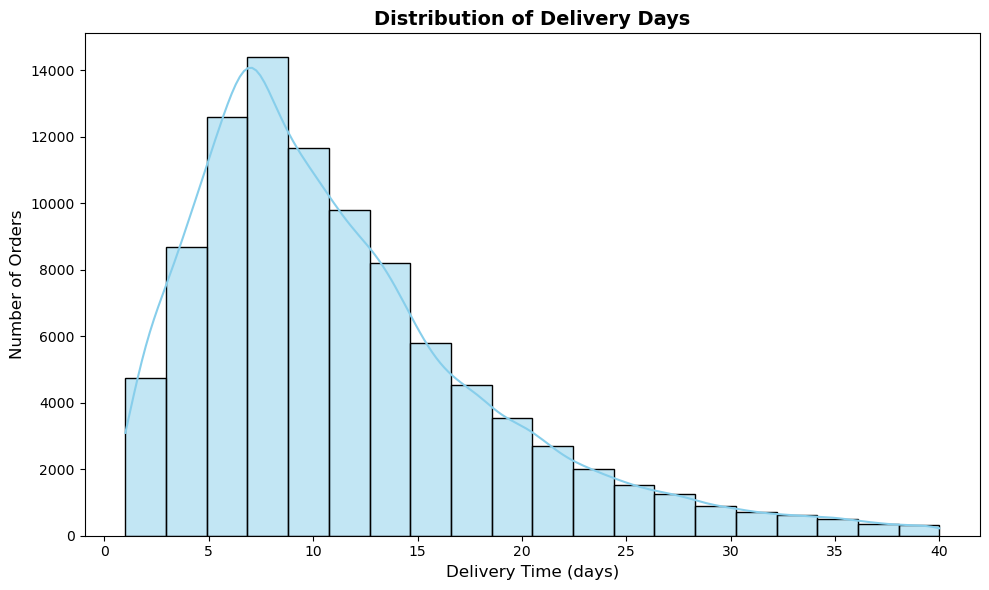

In [341]:
plt.figure(figsize=(10,6))
sns.histplot(data=filtered_delivery, x='delivery_days', bins=20, color='skyblue', edgecolor='black', kde = True)

plt.title("Distribution of Delivery Days", fontsize=14, weight = 'bold')
plt.xlabel("Delivery Time (days)", fontsize=12)
plt.ylabel("Number of Orders", fontsize=12)
plt.tight_layout()

In [342]:
filtered_delivery['delivery_days'].describe()

count    94849.000000
mean        11.376314
std          7.324832
min          1.000000
25%          6.000000
50%         10.000000
75%         15.000000
max         40.000000
Name: delivery_days, dtype: float64

### Key Insights in Delivery Time

> #### **Most Deliveries Happen Within 6–15 Days**
- 50% of all deliveries fall within the 6 to 15 day range (IQR).
- This range reflects a consistent and predictable delivery window, ideal for setting customer expectations

> #### **Mean > Median Indicates Asymmetry in Delivery Times**
- The mean delivery time is 11.38 days, while the median is 10 days.
- This gap reveals a right-skewed distribution, where most deliveries are faster, but a smaller number of delayed deliveries inflate the average.
- The median is a better reflection of typical customer experience.

> #### **~1.69% of Orders Are Potential Data Anomalies**
We excluded  **1,627 anomalous rows** (1.69%) from the histogram:  
- Deliveries recorded as **0 days** (likely errors or same-day delivery)
- Deliveries taking **more than 40 days**, possibly due to returns, holidays, or timestamp issues
- This orders are considered outliers. They may result from:
  - Data entry issues
  - Exceptional circumstances (e.g., holidays, returns)
  - Failed or delayed deliveries (missed SLAs)
- This segment should be further investigated to improve accuracy and performance.


Is there any relationship between delivery time and customer review score?

In [343]:
relationship_delivery_review = orders_customer_delivery.merge(reviews, on = 'order_id', how = 'left')[['order_id', 'delivery_days', 'review_score']]

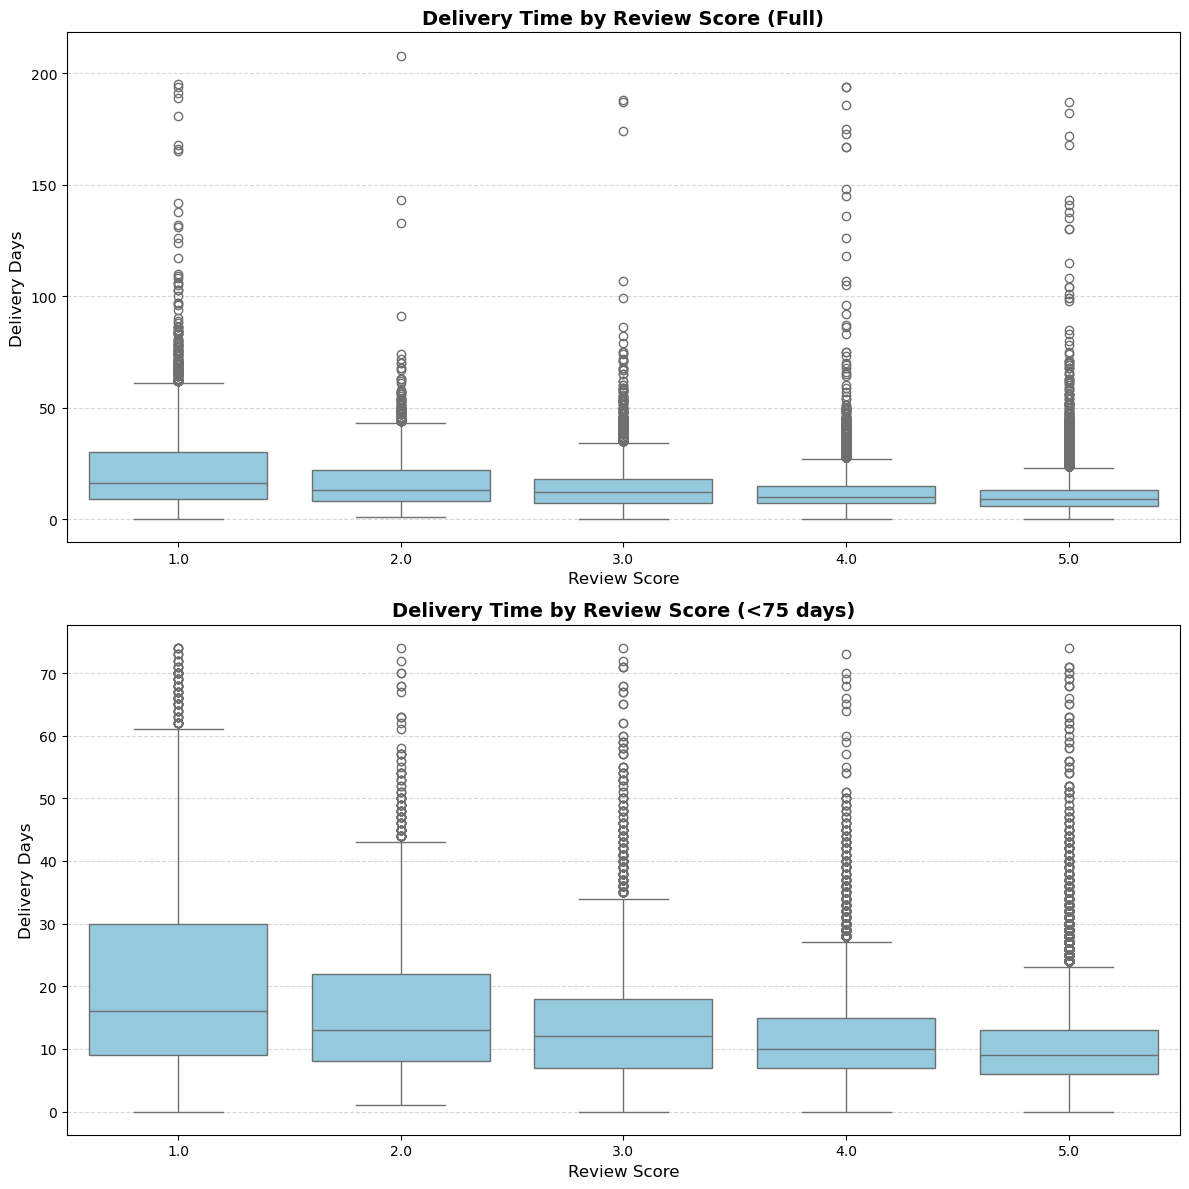

In [344]:
fig, axs = plt.subplots(2, figsize=(12, 12))

sns.boxplot(relationship_delivery_review, x='review_score', y='delivery_days', color='skyblue', ax=axs[0])
sns.boxplot(relationship_delivery_review[relationship_delivery_review['delivery_days'] < 75], x='review_score', y='delivery_days', color='skyblue', ax=axs[1])

for ax in axs:
    ax.grid(axis='y', linestyle='--', alpha=0.5)

axs[0].set_title("Delivery Time by Review Score (Full)", fontsize=14, weight='bold')
axs[0].set_xlabel("Review Score", fontsize=12)
axs[0].set_ylabel("Delivery Days", fontsize=12)

axs[1].set_title("Delivery Time by Review Score (<75 days)", fontsize=14, weight='bold')
axs[1].set_xlabel("Review Score", fontsize=12)
axs[1].set_ylabel("Delivery Days", fontsize=12)

plt.tight_layout()

### Key Insights in relationship between delivery time and customer review score
- **Longer delivery times are generally associated with lower review scores.**
- **Most 5-star reviews occur within the first 10 days**, with a noticeable decline as delivery time increases.
- Some high ratings still occur after long delivery delays, which suggests that factors such as product quality or customer service may outweigh delivery issues for some buyers.

Are there certain states/regions where delivery tends to take longer?

In [345]:
states_delivery = orders_customer_delivery.merge(customers, on = 'customer_id', how='left')

In [346]:
delivery_days_state = states_delivery.groupby('customer_state', as_index=False)['delivery_days'].mean().sort_values('delivery_days')

In [347]:
delivery_days_state

,customer_state,delivery_days
25,SP,8.298061
17,PR,11.526711
10,MG,11.543813
6,DF,12.509135
23,SC,14.479560
22,RS,14.819237
18,RJ,14.849186
8,GO,15.150741
11,MS,15.191155
7,ES,15.331830


In [348]:
delivery_days_state['delivery_days'].mean()

18.32181013309867

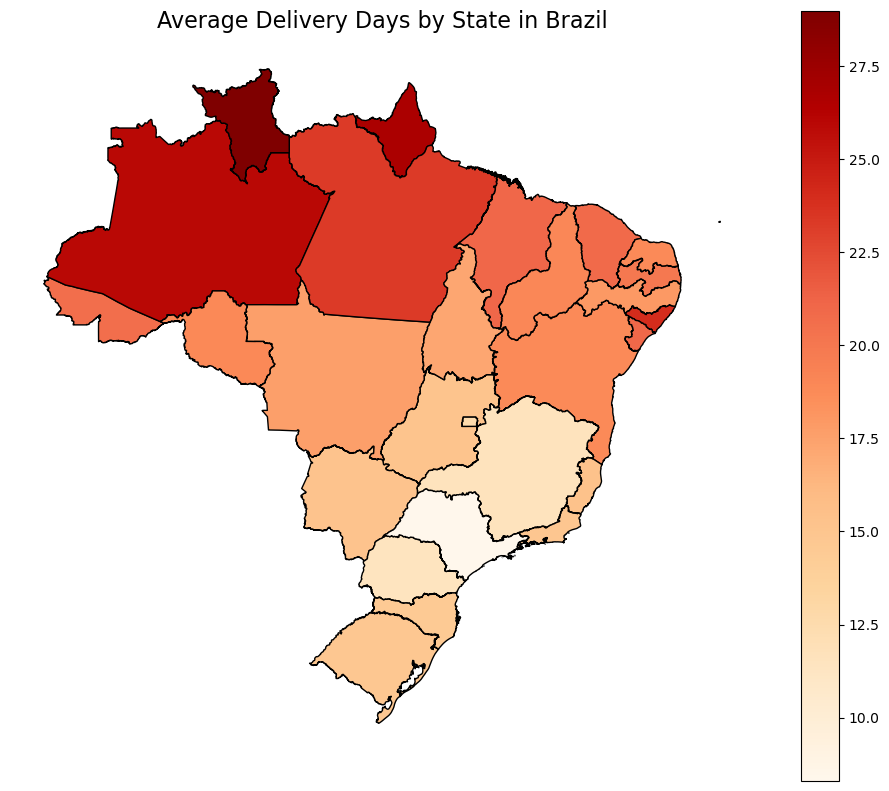

In [349]:
import geopandas as gpd

#Brazil states GeoJSON
geojson_url = "https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/brazil-states.geojson"
gdf = gpd.read_file(geojson_url)

state_codes = {
    'Acre': 'AC', 'Alagoas': 'AL', 'Amapá': 'AP', 'Amazonas': 'AM', 'Bahia': 'BA', 'Ceará': 'CE',
    'Distrito Federal': 'DF', 'Espírito Santo': 'ES', 'Goiás': 'GO', 'Maranhão': 'MA', 'Mato Grosso': 'MT',
    'Mato Grosso do Sul': 'MS', 'Minas Gerais': 'MG', 'Pará': 'PA', 'Paraíba': 'PB', 'Paraná': 'PR',
    'Pernambuco': 'PE', 'Piauí': 'PI', 'Rio de Janeiro': 'RJ', 'Rio Grande do Norte': 'RN',
    'Rio Grande do Sul': 'RS', 'Rondônia': 'RO', 'Roraima': 'RR', 'Santa Catarina': 'SC',
    'São Paulo': 'SP', 'Sergipe': 'SE', 'Tocantins': 'TO'
}

gdf['UF'] = gdf['name'].map(state_codes)

merged = gdf.merge(delivery_days_state, left_on='UF', right_on='customer_state')

fig, ax = plt.subplots(1, 1, figsize=(12, 10))
merged.plot(column='delivery_days', ax=ax, legend=True, cmap='OrRd', edgecolor='black')

ax.set_title('Average Delivery Days by State in Brazil', fontdict={'fontsize': 16})
ax.axis('off')

plt.show()


### Key Insights in Delivery Time Disparities Across Brazilian States

An analysis of delivery times across Brazil reveals **significant regional disparities**. The **Northern states** (such as Amazonas, Amapá, and Roraima) experience **substantially longer delivery times** compared to more industrialized regions like **São Paulo (SP)** or **Paraná (PR)**.

Delivery in **Northern Brazil** takes **2–3x longer** than in Southeastern states.  
This gap is largely due to **logistical and infrastructural challenges** such as:
- Difficult access to remote areas  
- Limited road and rail infrastructure  
- Heavy reliance on rivers and air freight  
- Seasonal weather disruptions

*Source: [ALG Global – Logistics Challenges in Northern Brazil](https://www.alg-global.com/blog/logistics/transportation-and-logistics-challenges-northern-brazil)*


## Payments

What payment methods do customers use most often?

In [350]:
payment_methods = valid_payments.groupby('payment_type', as_index=False).size().sort_values('size', ascending=False)
payment_methods

,payment_type,size
1,credit_card,76795
0,boleto,19784
3,voucher,5769
2,debit_card,1529


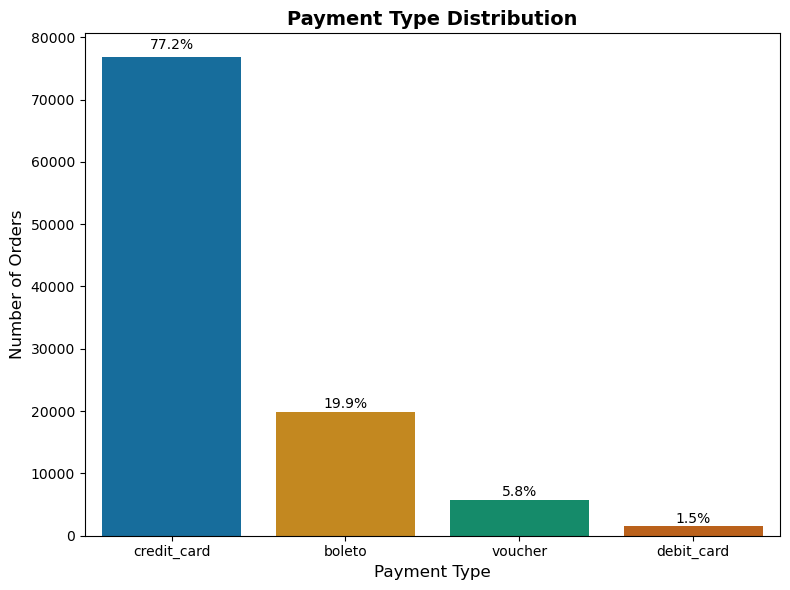

In [351]:
plt.figure(figsize=(8,6))
ax = sns.barplot(payment_methods, x='payment_type', y='size', palette='colorblind', hue = 'payment_type')

for p in ax.patches:
    height = p.get_height()
    percentage = f'{100 * height / total:.1f}%'
    ax.text(p.get_x() + p.get_width() / 2, height + height * 0.01, percentage,
        ha='center', va='bottom', fontsize=10)

plt.title('Payment Type Distribution', fontsize=14, weight = 'bold')
plt.xlabel('Payment Type', fontsize = 12)
plt.ylabel('Number of Orders', fontsize = 12)
plt.tight_layout()

How common are installment payments (more than one payment per order)?

In [352]:
installment_payments = valid_payments[valid_payments['payment_installments'] > 1]

In [353]:
installment_payments

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
5,298fcdf1f73eb413e4d26d01b25bc1cd,1,credit_card,2,96.12
7,3d7239c394a212faae122962df514ac7,1,credit_card,3,51.84
...,...,...,...,...,...
103878,2e3d96522c8c378d4135c12a65c977aa,1,credit_card,4,47.62
103879,c45067032fd84f4cf408730ff5205568,1,credit_card,2,198.94
103880,7159096c5aa9be77f7f0c26c01ee9793,1,credit_card,4,280.65
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80


In [354]:
len(installment_payments) / len(valid_payments) * 100

49.421912454152505

In [355]:
valid_payments['payment_installments'].mean()

2.853509439048105

In [356]:
hist_plot = installment_payments.groupby('payment_installments', as_index=False).agg(
    mean_payment=('payment_value', 'mean'),
    count=('payment_value', 'count')
)

In [357]:
hist_plot

,payment_installments,mean_payment,count
0,2,127.228150,12413
1,3,142.539317,10461
2,4,163.976840,7098
3,5,183.465222,5239
4,6,209.849952,3920
5,7,187.673672,1626
6,8,307.737427,4268
7,9,203.440870,644
8,10,415.085837,5328
9,11,124.932174,23


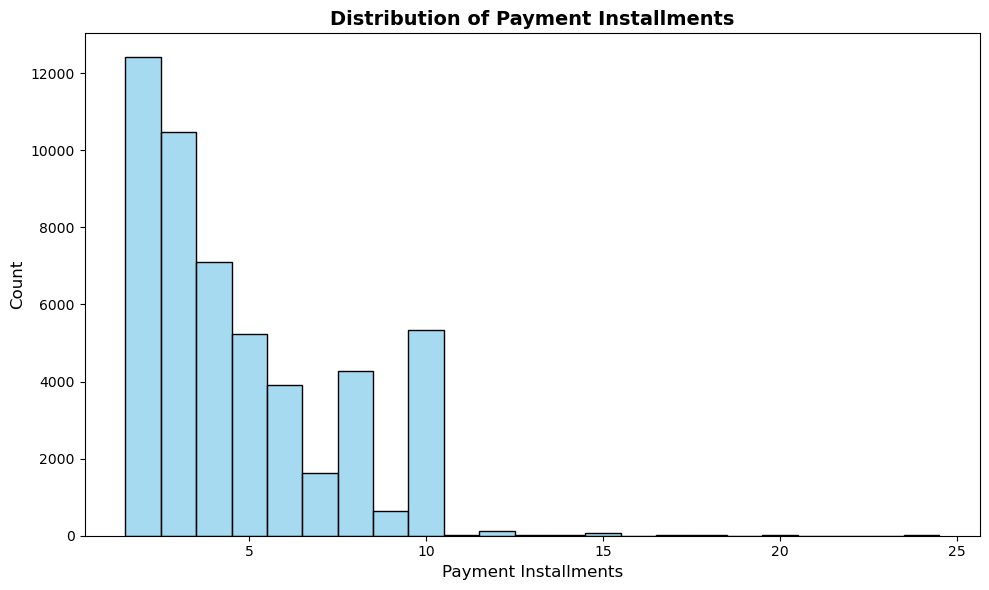

In [358]:
plt.figure(figsize=(10,6))

sns.histplot(
    data=installment_payments,
    x='payment_installments',
    color = 'skyblue',
    bins=len(installment_payments['payment_installments'].unique()),
    discrete=True
)

plt.xlabel('Payment Installments', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.title('Distribution of Payment Installments', fontsize = 14, weight = 'bold')
plt.tight_layout()

What is the average order value?

In [359]:
full_payment = valid_payments.groupby('order_id', as_index=False)['payment_value'].sum()

In [360]:
full_payment['payment_value'].mean()

160.9951237466939

### Payment Insights

Analysis of 103,877 valid payments reveals that credit cards dominate as the preferred payment method, accounting for **77.2%** of transactions, followed by boleto at **20%**. Nearly half of all payments (**49.4%**) are made in multiple installments, with an average of **2.85** installments per payment, indicating customer preference for payment flexibility. The average order value is approximately **161 BRL**.

Notably, average payment amounts tend to increase with more installments, although data beyond 10 installments is sparse, which may reduce reliability in that segment.

These insights suggest offering diverse installment options is vital to meet customer needs and potentially boost order values.


## Geography & Locations

Which states have the highest number of customers?

In [361]:
customer_orders = orders.merge(customers, on = 'customer_id', how = 'right')

In [362]:
customer_orders.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,Month_Year_purchase,day_of_purchase,delivery_days,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
47190,eae46740151daff6420b7acc4a9348f9,297ce1faa7fd43b6c512673f8ee51322,delivered,2018-01-04 22:42:14,2018-01-04 22:50:34,2018-01-10 20:53:31,2018-01-24 12:47:12,2018-02-06,2018-01,Thursday,19.0,990e9e5aff5387a6c9cc79d9c4a4c5f6,85585,vere,PR
90316,31ffe8189e41e4bbad1c872b804c6bfd,722014e4b4beb1e103b28f711a906d36,delivered,2017-04-14 19:52:22,2017-04-14 20:05:09,2017-04-17 08:38:59,2017-04-20 20:49:13,2017-05-08,2017-04,Friday,6.0,34170ebf706ad24701b17511f61db9c3,7985,francisco morato,SP
12152,1def5208ea4cb393260ab333be753296,31ba3483559016b09049d2a84f6eef2c,delivered,2018-06-21 11:15:18,2018-06-21 11:41:23,2018-06-21 14:37:00,2018-07-30 20:06:43,2018-07-24,2018-06,Thursday,39.0,e5c4e27b96f4edcef60ed1469a402db4,48300,conde,BA
6621,fb7a3213facd63106674c2d4fe0813ae,72ad3b059873841f4e0cc95d7eb93de2,delivered,2018-05-07 21:54:51,2018-05-08 04:32:55,2018-05-08 13:16:00,2018-05-17 21:32:00,2018-06-13,2018-05,Monday,9.0,6354bc4ea9af4b861d0b019ee10c40ac,23088,rio de janeiro,RJ
93672,96b313e094ee31cef7c8a4ffd3b36395,6b6dfbbc6ce8a28d6551efb5b39f74b4,delivered,2017-06-09 14:31:39,2017-06-09 14:42:22,2017-06-13 14:28:15,2017-06-22 16:42:45,2017-07-10,2017-06,Friday,13.0,5dd95c39ad6f85ea561f7fb60740fedc,46100,brumado,BA


In [363]:
customers_by_state = customer_orders.groupby('customer_state', as_index=False)['customer_unique_id'].nunique().rename(columns={
    'customer_unique_id': 'customers_count'
}).sort_values('customers_count', ascending=False)

In [364]:
customers_by_state

,customer_state,customers_count
25,SP,40302
18,RJ,12384
10,MG,11259
22,RS,5277
17,PR,4882
23,SC,3534
4,BA,3277
6,DF,2075
7,ES,1964
8,GO,1952


In [365]:
customers_by_state.loc[customers_by_state['customer_state'] == 'SP', 'customers_count'].sum() / customers_by_state['customers_count'].sum() * 100

41.92186069734542

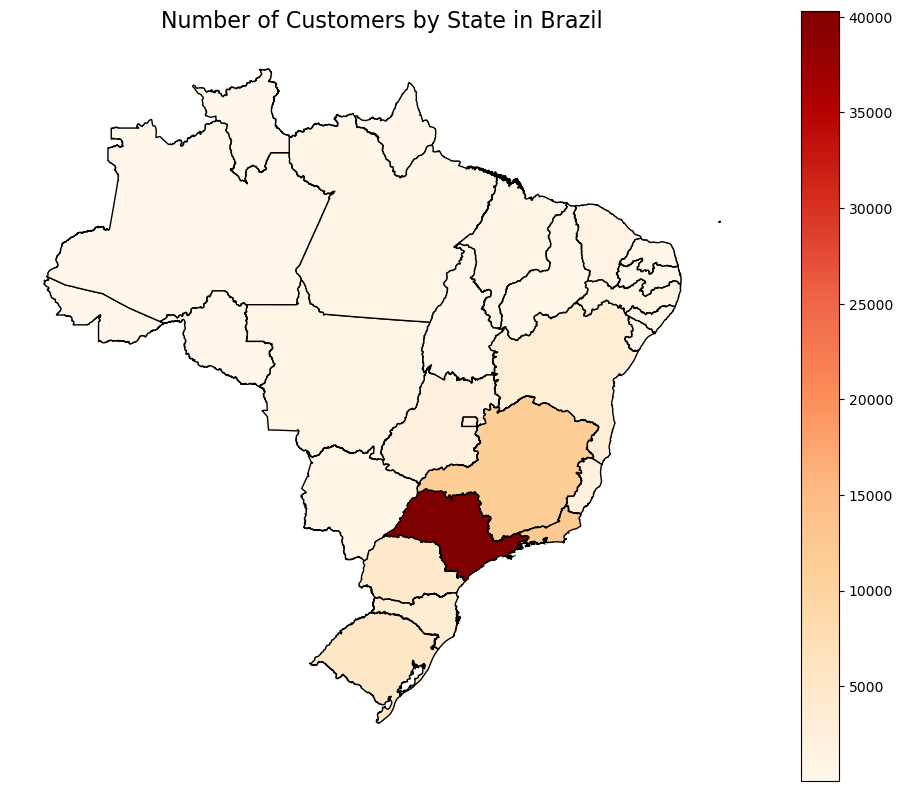

In [366]:
#Brazil states GeoJSON
geojson_url = "https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/brazil-states.geojson"
gdf = gpd.read_file(geojson_url)

state_codes = {
    'Acre': 'AC', 'Alagoas': 'AL', 'Amapá': 'AP', 'Amazonas': 'AM', 'Bahia': 'BA', 'Ceará': 'CE',
    'Distrito Federal': 'DF', 'Espírito Santo': 'ES', 'Goiás': 'GO', 'Maranhão': 'MA', 'Mato Grosso': 'MT',
    'Mato Grosso do Sul': 'MS', 'Minas Gerais': 'MG', 'Pará': 'PA', 'Paraíba': 'PB', 'Paraná': 'PR',
    'Pernambuco': 'PE', 'Piauí': 'PI', 'Rio de Janeiro': 'RJ', 'Rio Grande do Norte': 'RN',
    'Rio Grande do Sul': 'RS', 'Rondônia': 'RO', 'Roraima': 'RR', 'Santa Catarina': 'SC',
    'São Paulo': 'SP', 'Sergipe': 'SE', 'Tocantins': 'TO'
}

gdf['UF'] = gdf['name'].map(state_codes)

merged = gdf.merge(customers_by_state, left_on='UF', right_on='customer_state')

fig, ax = plt.subplots(1, 1, figsize=(12, 10))
merged.plot(column='customers_count', ax=ax, legend=True, cmap='OrRd', edgecolor='black')

ax.set_title('Number of Customers by State in Brazil', fontdict={'fontsize': 16})
ax.axis('off')

plt.show()


Where are most sellers located? Are they concentrated in specific regions?

In [367]:
sellers_state = sellers.groupby('seller_state', as_index=False)['seller_id'].nunique().rename(columns={
    'seller_id': 'sellers_count'
}).sort_values('sellers_count', ascending=False)

In [368]:
sellers_state

,seller_state,sellers_count
22,SP,1849
15,PR,349
8,MG,244
20,SC,190
16,RJ,171
19,RS,129
6,GO,40
4,DF,30
5,ES,23
2,BA,19


In [369]:
sellers_state.loc[sellers_state['seller_state'] == 'SP', 'sellers_count'].sum() / sellers_state['sellers_count'].sum() * 100

59.741518578352185

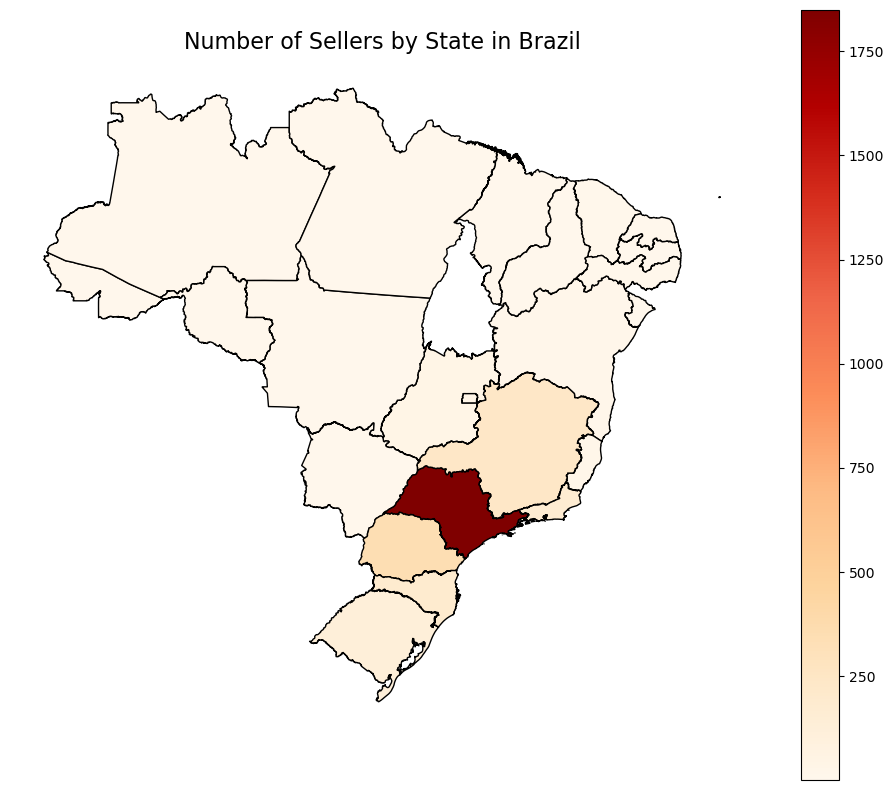

In [370]:
#Brazil states GeoJSON
geojson_url = "https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/brazil-states.geojson"
gdf = gpd.read_file(geojson_url)

state_codes = {
    'Acre': 'AC', 'Alagoas': 'AL', 'Amapá': 'AP', 'Amazonas': 'AM', 'Bahia': 'BA', 'Ceará': 'CE',
    'Distrito Federal': 'DF', 'Espírito Santo': 'ES', 'Goiás': 'GO', 'Maranhão': 'MA', 'Mato Grosso': 'MT',
    'Mato Grosso do Sul': 'MS', 'Minas Gerais': 'MG', 'Pará': 'PA', 'Paraíba': 'PB', 'Paraná': 'PR',
    'Pernambuco': 'PE', 'Piauí': 'PI', 'Rio de Janeiro': 'RJ', 'Rio Grande do Norte': 'RN',
    'Rio Grande do Sul': 'RS', 'Rondônia': 'RO', 'Roraima': 'RR', 'Santa Catarina': 'SC',
    'São Paulo': 'SP', 'Sergipe': 'SE', 'Tocantins': 'TO'
}

gdf['UF'] = gdf['name'].map(state_codes)

merged = gdf.merge(sellers_state, left_on='UF', right_on='seller_state')

fig, ax = plt.subplots(1, 1, figsize=(12, 10))
merged.plot(column='sellers_count', ax=ax, legend=True, cmap='OrRd', edgecolor='black')

ax.set_title('Number of Sellers by State in Brazil', fontdict={'fontsize': 16})
ax.axis('off')

plt.show()


### Geography & Locations Insights

As we can see from the charts, **São Paulo (SP)** dominates both sides of the marketplace, hosting **60% of all sellers** and **42% of customers**. This indicates that the state is not only the primary hub for buyers but also the central supply region for sellers.

Other highly represented customer states are **Rio de Janeiro (RJ, 12%)** and **Minas Gerais (MG, 11%)**, whereas sellers are more concentrated in **Paraná (PR, 11%)** and **Minas Gerais (MG, 8%)** after São Paulo. 

This distribution suggests that while the customer base is more spread across multiple states, the majority of sellers are heavily concentrated in São Paulo. Therefore, although customers and sellers overlap in the same leading state (SP), **customers are more geographically dispersed**, creating potential challenges and opportunities for logistics and delivery times.


# Final Results & Business Recommendations  

The analysis of the Olist dataset highlights key patterns in customer behavior, product performance, logistics, and payment preferences that can inform strategic business decisions.  

### 1. Customer Behavior & Sales Trends  
- Online shopping in Brazil is growing steadily, with Mondays being the most popular day for purchases.  
- Seasonal peaks indicate opportunities to align promotions with high-demand months.  
**Recommendation:** Plan marketing campaigns around seasonal peaks and optimize promotions for the start of the week when engagement is highest.  

### 2. Product Strategy  
- `bed_bath_table` and `health_beauty` dominate in sales volume and revenue but show relatively low average order values.  
- Niche categories like `computers` generate fewer sales but achieve higher value per purchase.  
**Recommendation:** Maintain strong presence in high-volume categories while exploring strategies to boost order value (bundling, premium products). Invest in high-value niches with tailored marketing.  

### 3. Logistics & Delivery Performance  
- Typical delivery time is 6–15 days, but customers in Northern Brazil wait up to 2–3x longer than those in Southeastern regions.  
- Longer delivery times are strongly linked to lower customer review scores.  
**Recommendation:** Strengthen logistics in Northern regions through partnerships with local carriers, better route planning, and alternative transport methods. Communicate realistic delivery expectations to maintain trust.  

### 4. Payments & Customer Experience  
- Credit cards account for 77% of payments, with nearly half of customers opting for installments (avg. 2.85).  
- Higher installment options are associated with higher order values.  
**Recommendation:** Continue supporting diverse installment options to encourage higher spending. Offer incentives for customers to use installments responsibly.  

### 5. Marketplace Dynamics & Regional Focus  
- São Paulo dominates the market (42% of customers, 60% of sellers), but buyers are more geographically dispersed.  
**Recommendation:** While SP remains the core market, expanding seller presence in other states can reduce delivery delays and improve customer satisfaction.  

---

**Overall Business Insight:**  
Brazilian e-commerce is growing rapidly but remains geographically uneven. Companies that combine efficient logistics, flexible payment options, and region-specific marketing can capture both the dense urban hubs (SP, RJ, MG) and unlock new opportunities in the logistically challenging Northern regions. To achieve sustainable growth, sellers and marketplaces should prioritize logistics optimization, financial accessibility, and product diversification—strengthening their presence in established markets while expanding into underserved areas.

